# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
#Importing Crucial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Getting the Data

In [ ]:
ad_data = pd.read_csv('advertising.csv') #Reading the data in dataframe ad_data

In [5]:
ad_data.head() #Checking the head of the dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
#Briefing on the dataset
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


# Exploratory Data Analysis

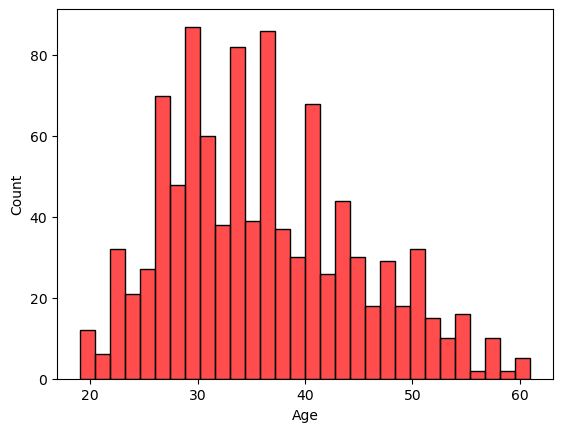

In [ ]:
# Creating a histogram of the Age
sns.histplot(ad_data['Age'], bins=30, kde=False, color='red', alpha=0.7)
plt.show()
# Majority of the people are in the age group of 30-40


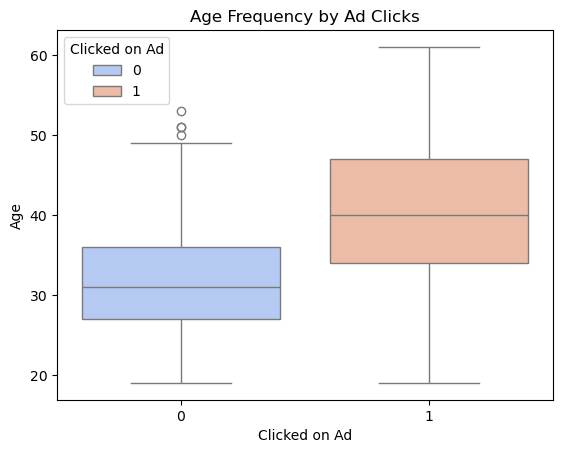

In [ ]:
# Analyzing the Age frequency by boxplot
sns.boxplot(y='Age', x='Clicked on Ad', data=ad_data, palette='coolwarm', hue='Clicked on Ad')
plt.title('Age Frequency by Ad Clicks')
plt.xlabel('Clicked on Ad')
plt.ylabel('Age')
plt.show()
# Those who clicked on the ad are between 35-45 years of age ( A bit older!)
# Those who did not click on the ad are between 25-35 years of age

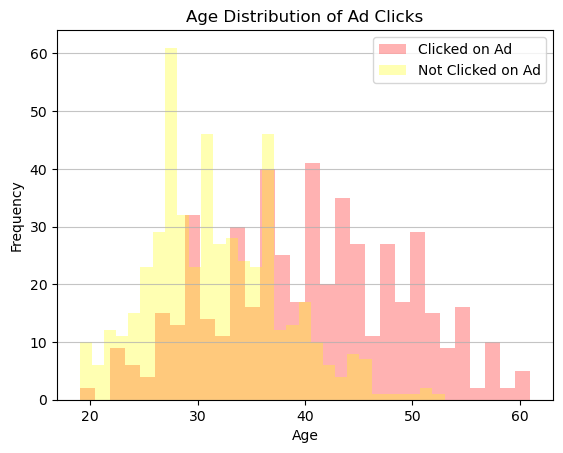

In [ ]:
plt.hist(ad_data.Age[ad_data['Clicked on Ad'] ==1], bins=30, 
         color='red', alpha=0.3, label='Clicked on Ad')
plt.hist(ad_data.Age[ad_data['Clicked on Ad'] ==0], bins=30, 
         color='yellow', alpha=0.3, label='Not Clicked on Ad')
plt.title('Age Distribution of Ad Clicks')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Certainly, the age group of 30-40 years is more likely to click on the ad

In [18]:
ad_data.Age[ad_data['Clicked on Ad'] ==1]

7      48
10     49
12     48
14     33
15     23
       ..
994    28
995    30
996    45
997    51
999    26
Name: Age, Length: 500, dtype: int64

/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


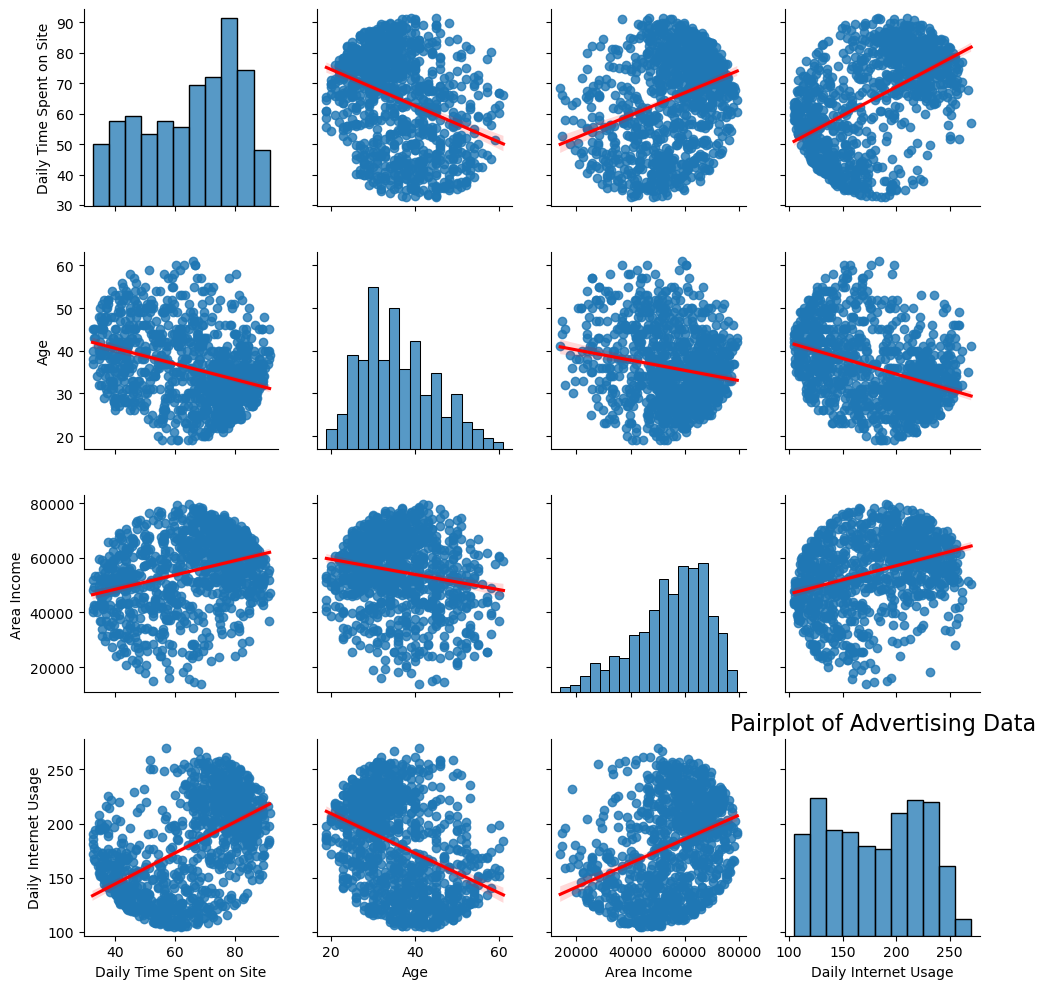

In [34]:
# Creating a pairplot between the continuous variable columns
sns.pairplot(ad_data.drop(['Male','Clicked on Ad'],axis = 1), diag_kind='hist', 
              kind='reg', plot_kws={'line_kws':{'color':'red'}}, palette='coolwarm')


plt.title('Pairplot of Advertising Data', fontsize=16)

plt.tight_layout()

plt.show()

# Observations:

# For daily time spent on site:
     # With Age it decreases
        # With Area Income it increases
            # With Daily Internet Usage it increases
               # The histogram is not normally distributed
                
# For Area Income:
     # With Age it decreases which means area with more elderly people have less income
       #The histogram is normally distributed but it is left skewed
# For Daily Internet Usage:
     # With Age it decreases which means elderly people use less internet
        # With Area Income it increases which means people with more income use more internet
            # The histogram is not normally distributed

#For Age:
    # The histogram is normally distributed
        # The boxplot shows that the age group of 30-40 years is more likely to click on the ad

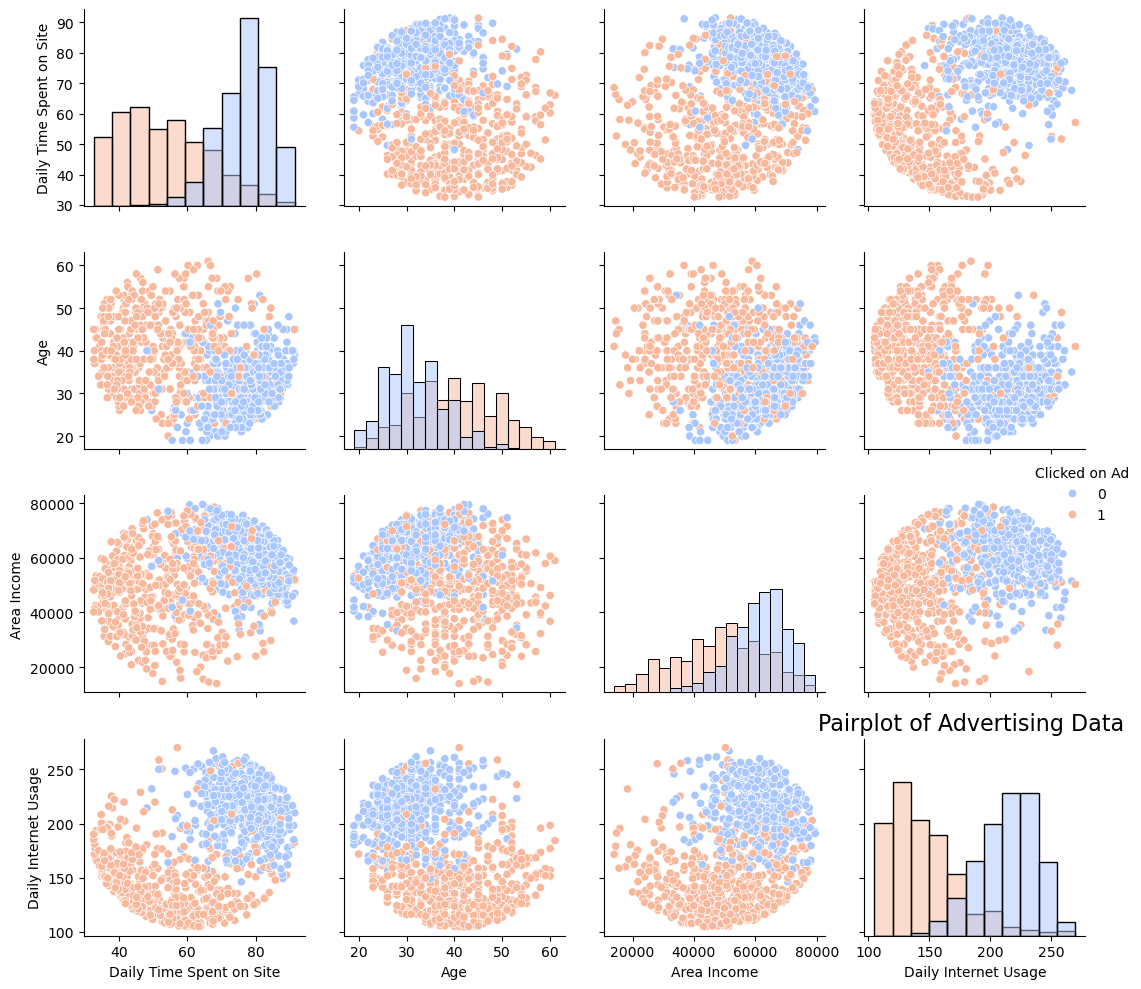

In [ ]:
sns.pairplot(ad_data.drop(['Male'], axis=1), diag_kind='hist', 
              palette='coolwarm', hue='Clicked on Ad')


plt.title('Pairplot of Advertising Data ', fontsize=16)

plt.tight_layout()

plt.show()

# The hue shows that the target variable 'Clicked on Ad' is linearly separable

Preparing the data for logistic regression

In [44]:
#lets relook at the data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
unique_ad_topics = ad_data["Ad Topic Line"].nunique() # Checking the unique values in the column
ad_topic_counts = ad_data["Ad Topic Line"].value_counts() # Checking the frequency of unique values in the column
print(f"Number of unique ad topics: {unique_ad_topics}") # Output the number of unique ad topics
print(ad_topic_counts) # Output the frequency of unique ad topics



Number of unique ad topics: 1000
Ad Topic Line
Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: count, Length: 1000, dtype: int64


In [46]:
# The column 'Ad Topic Line' has 1000 unique values which means each ad is unique
# The column 'Ad Topic Line' is not useful for the analysis
# Dropping the column 'Ad Topic Line'
ad_data.drop('Ad Topic Line', axis=1, inplace=True)

In [47]:
ad_data["City"].nunique() # Checking the unique values in the column
city_counts = ad_data["City"].value_counts() # Checking the frequency of unique values in the column
print(f"Number of unique cities: {ad_data['City'].nunique()}") # Output the number of unique cities
print(city_counts) # Output the frequency of unique cities

Number of unique cities: 969
City
Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: count, Length: 969, dtype: int64


In [48]:
# The column 'City' has 969 unique values which means each city occurs sparsely
# The column 'City' is not useful for the analysis
# Dropping the column 'City'
ad_data.drop('City', axis=1, inplace=True)

In [49]:
# Convert Timestamp to datetime
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])


ad_data['Hour'] = ad_data['Timestamp'].dt.hour
#ad_data['Day'] = ad_data['Timestamp'].dt.day
ad_data['Month'] = ad_data['Timestamp'].dt.month
#ad_data['Year'] = ad_data['Timestamp'].dt.year

In [ ]:
ad_data['Hour'].nunique() # Checking the unique values in the column
hour_counts = ad_data['Hour'].value_counts() # Checking the frequency of unique values in the column
print(f"Number of unique hours: {ad_data['Hour'].nunique()}") # Output the number of unique hours
print(hour_counts) # Output the frequency

# The column 'Hour' has 24 unique values with each hour occurring a good number of times
# The column 'Hour' is useful for the analysis

Number of unique hours: 24
Hour
7     54
20    50
9     49
21    48
0     45
23    44
5     44
22    43
14    43
8     43
4     42
13    42
3     42
17    41
18    41
11    40
19    39
6     39
16    39
12    38
2     36
15    35
1     32
10    31
Name: count, dtype: int64


In [51]:
ad_data['Hour'].sort_values()

0       0
543     0
538     0
523     0
517     0
       ..
389    23
385    23
322    23
960    23
416    23
Name: Hour, Length: 1000, dtype: int32

In [52]:
# But rather than using the Hour as a feature, we can categorise it into 
# Morning, Afternoon, Evening, and Night
# This will be more meaningful for the analysis
ad_data['Time Slot'] = ad_data['Hour'].apply(lambda x: 'Morning' if 6 <= x < 12 else
                                              'Afternoon' if 12 <= x < 17 
                                              else 'Evening' if 17 <= x < 20 else 'Night')


In [54]:
# The feature Month should be logically categorized into seasons
# This will be more meaningful for the analysis
ad_data['Season'] = ad_data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                              'Spring' if x in [3, 4, 5] 
                                              else 'Summer' if x in [6, 7, 8] else 'Autumn')

In [55]:
# Dropping the columns 'Timestamp', 'Hour' and 'Month' as they are not useful for the analysis
ad_data.drop(columns=['Timestamp', 'Hour', 'Month'], inplace=True)

In [57]:
# Converting Time Slot and Season to categorical variables
ad_data['Time Slot'] = ad_data['Time Slot'].astype('category')
ad_data['Season'] = ad_data['Season'].astype('category')

In [ ]:
# Converting categorical variables to numeric using one-hot encoding
ad_data = pd.get_dummies(ad_data, columns=['Time Slot', 'Season'],
                          drop_first=True, dtype='int64',
                          prefix=['Time Slot', 'Season'], prefix_sep='_')

In [60]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Time Slot_Evening,Time Slot_Morning,Time Slot_Night,Season_Summer,Season_Winter
0,68.95,35,61833.90,256.09,0,Tunisia,0,0,0,1,0,0
1,80.23,31,68441.85,193.77,1,Nauru,0,0,0,1,0,0
2,69.47,26,59785.94,236.50,0,San Marino,0,0,0,1,0,0
3,74.15,29,54806.18,245.89,1,Italy,0,0,0,1,0,1
4,68.37,35,73889.99,225.58,0,Iceland,0,0,0,1,1,0


In [ ]:
 # Finding unique values in the column 'Country'
unique_countries = ad_data['Country'].nunique()
print(f'Unique countries: {unique_countries}')  
print(ad_data['Country'].value_counts()) # Checking the frequency of 
#unique values in the column



Unique countries: 237
Country
France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: count, Length: 237, dtype: int64


In [63]:
# The column 'Country' has 237 unique values which means each country occurs sparsely
# The column 'Country' is not useful for the analysis
# Dropping the column 'Country'
ad_data.drop('Country', axis=1, inplace=True)

# The data is now ready for analysis by Logistic regression

* Continuos Variables
    * Daily Time Spent on Site
    * Age
    * Area Income
    * Daily Internet Usage

* Dummy Categorical Variables
    * Male
    * Time Slots
    * Seasons



In [ ]:
# Deciding the features and target variable
X = ad_data.drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']

In [65]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [69]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Importing the Logistic Regression model library
from sklearn.linear_model import LogisticRegression


In [70]:
# Creating an instance of the model
logmodel = LogisticRegression(max_iter=1000)

In [71]:
# Fitting the model to the training data
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Predictions and Evaluations

In [72]:
predictions = logmodel.predict(X_test)

In [74]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparison.head(10)

,Actual,Predicted
545,1,1
298,0,0
109,0,0
837,1,1
194,0,0
605,1,1
246,1,1
693,1,1
802,1,1
406,1,1


In [89]:

accuracy = pd.DataFrame(comparison['Actual'] == comparison['Predicted']).value_counts(normalize=True)
print(f'Accuracy: {accuracy[True]:.2%}')


Accuracy: 96.80%


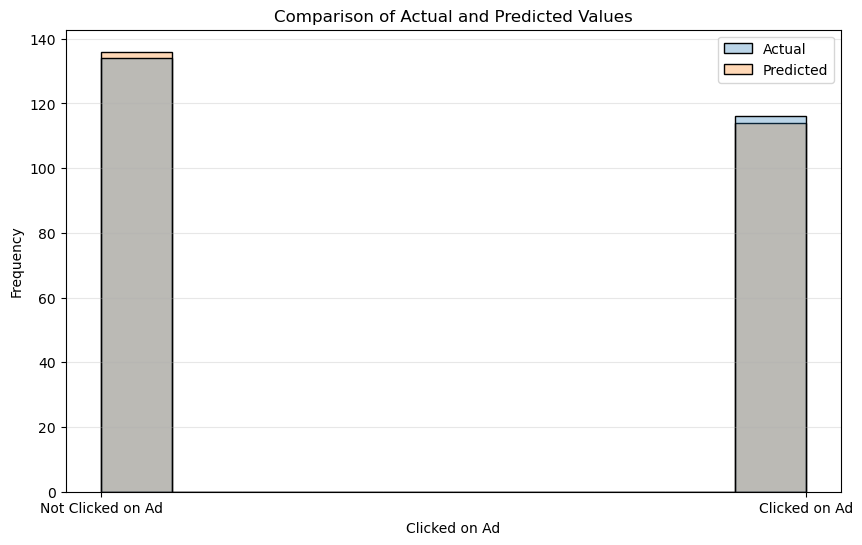

In [95]:
# Can we plot the comparison?
plt.figure(figsize=(10, 6))
sns.histplot(comparison, bins=10, kde=False, alpha=0.3, color='blue')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Clicked on Ad')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Clicked on Ad', 'Clicked on Ad'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [96]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[131,   3],
       [  5, 111]])

In [97]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       134
           1       0.97      0.96      0.97       116

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [ ]:
# Final features and their coefficients
final_features = X.columns
final_coefficients = logmodel.coef_.flatten()
features_coefficients = pd.DataFrame({'Features': final_features, 'Coefficients': final_coefficients})


features_coefficients.sort_values(by='Coefficients', ascending=False, inplace=True)
features_coefficients.reset_index(drop=True, inplace=True) 
print(features_coefficients)

                   Features  Coefficients
0                       Age      1.107595
1         Time Slot_Evening      0.212684
2         Time Slot_Morning      0.185751
3           Time Slot_Night      0.074370
4             Season_Summer      0.037213
5             Season_Winter     -0.120860
6                      Male     -0.212737
7               Area Income     -1.459794
8      Daily Internet Usage     -2.363397
9  Daily Time Spent on Site     -2.465006


/var/folders/qx/bz1vynbj5_g5cg431gd5_s7h0000gn/T/ipykernel_44949/829699048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficients', y='Features', data=features_coefficients, palette='coolwarm')


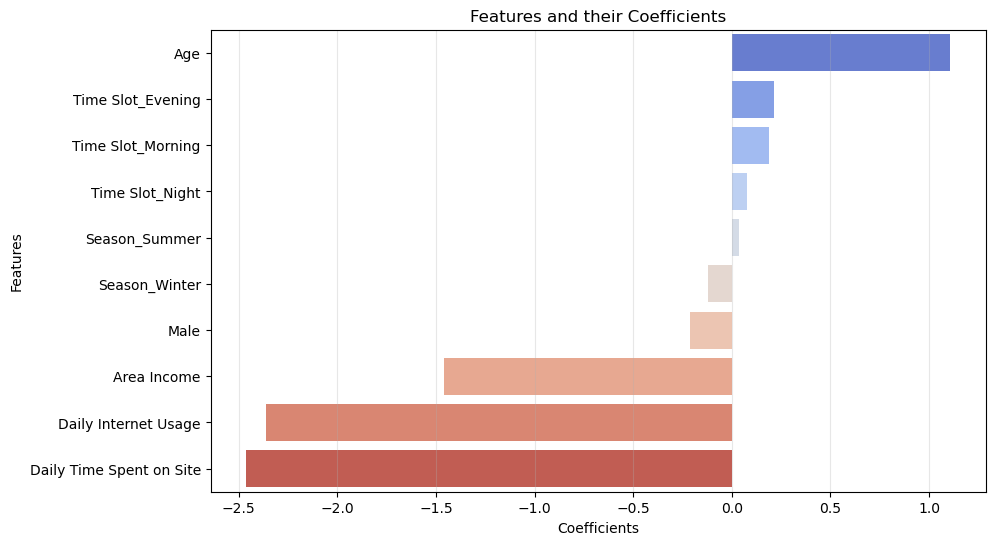

In [103]:
# Plotting the features and their coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=features_coefficients, palette='coolwarm')
plt.title('Features and their Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.3)
plt.show()

Hence, we have successfully classified the Target variable Clicked on Ad by Logistic Regression with 97% accuracy.